# Ball Prediction Visualisation

In [ ]:
import time

import numpy as np

import ball_models

## Import and Loading of Predictor

In [ ]:
import pathlib
import tomlkit


def load_toml(file_path: str):
    with open(pathlib.Path(file_path), mode="r") as fp:
        config = fp.read()
        config_dict = dict(tomlkit.parse(config))

    return config_dict


config_path = pathlib.Path(
    "/home/adittrich/test_workspace/workspace/src/ball_prediction/config/config.toml"
)
config = load_toml(config_path)

## Import data

In [ ]:
from aimy_target_shooting.export_tools import import_all_from_hdf5

path = "/home/adittrich/Nextcloud/82_Data_Processed/MN5008_training_data_with_outlier/MN5008_grid_data_equal_speeds.hdf5"
collection = import_all_from_hdf5(file_path=path)

data = collection.get_item(12)
time_stamps = np.array(data.time_stamps)
positions = np.array(data.positions)
velocities = np.array(data.velocities)

# Load predictor

In [ ]:
from ball_prediction.trajectory_prediction import TrajectoryPredictor

init_buffer_size = config["setting"]["init_buffer_size"]
predictor = TrajectoryPredictor(config)

time_stamps_predictions = []
position_predictions = []

time_stamps_predictions_unfiltered = []
position_predictions_unfiltered = []

for i in range(len(positions)):
    t_current = time_stamps[i]
    p = positions[i]
    v = velocities[i]

    z = np.hstack((p, v))

    t_0 = time.time()
    # <------------------------------------>
    predictor.input_samples(z, t_current)
    # <------------------------------------>
    deltat = time.time() - t_0

    if i % 10 == 0 and i > 20:
        # print(f"Update time: {deltat}")

        t_0 = time.time()
        # <-------------------------->
        predictor.predict_horizon()
        # <-------------------------->
        deltat = time.time() - t_0
        print(f"Prediction time: {deltat}")

        # Uniltered Predictions
        t_pred, q_pred = predictor.get_prediction(filter=False)
        time_stamps_predictions_unfiltered.append(t_pred)
        position_predictions_unfiltered.append(q_pred)

        # Filtered Predictions
        t_pred, q_pred = predictor.get_prediction()
        time_stamps_predictions.append(t_pred)
        position_predictions.append(q_pred)

positions_estimated = np.array(predictor.q_ests)

In [71]:
import matplotlib.pyplot as plt
from matplotlib.patches import FancyArrowPatch
from mpl_toolkits.mplot3d import proj3d

P0: [0.0, 0.0, 0.0]
P1: [0.  1.  0.5]
P2: [0.  1.  0.9]
[[0.0, 0.0], [0.0, 1.0], [0.0, 0.5]]
[[0.0, 0.0], [1.0, 1.0], [0.5, 0.9]]


Text(0.5, 0, 'Z')

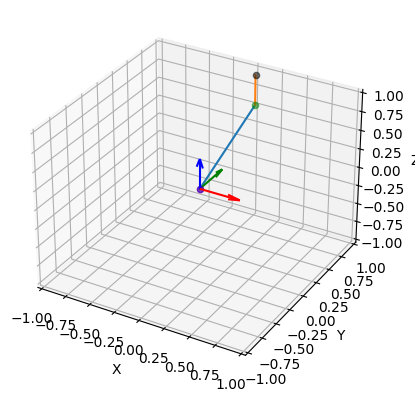